In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from mpl_toolkits import mplot3d
%matplotlib inline
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [2]:
allData = pd.read_csv("nflData.csv")
print(allData.head())
print(allData.shape)
print(allData.describe())
#Seeing what types of plays are in data set
print(allData["play_type"].value_counts())

   Unnamed: 0  play_id          game_id  season season_type  week home_team  \
0           1        1  2010_01_ARI_STL    2010         REG     1        LA   
1           2       36  2010_01_ARI_STL    2010         REG     1        LA   
2           3       58  2010_01_ARI_STL    2010         REG     1        LA   
3           4       82  2010_01_ARI_STL    2010         REG     1        LA   
4           5      103  2010_01_ARI_STL    2010         REG     1        LA   

  away_team posteam  yardline_100  ...  no_huddle  score_differential  \
0       ARI     NaN           NaN  ...          0                 NaN   
1       ARI     ARI          30.0  ...          0                 0.0   
2       ARI     ARI          78.0  ...          0                 0.0   
3       ARI     ARI          78.0  ...          0                 0.0   
4       ARI     ARI          73.0  ...          0                 0.0   

         wp       epa        cp  temp  wind  posteam_timeouts_remaining  \
0  0.422024

In [3]:
#Only interested in runs and passes so filter other play types out 
df = allData[(allData["play_type"] == "run") | (allData["play_type"] == "pass")]
print(df.describe())
#Get count of NAN per field in dataset
df.isna().sum()

          Unnamed: 0        play_id         season           week  \
count  442507.000000  442507.000000  442507.000000  442507.000000   
mean   316801.775667    2091.505244    2016.046842       9.546577   
std    182781.701247    1228.302235       3.756903       5.350858   
min         3.000000      36.000000    2010.000000       1.000000   
25%    158425.500000    1022.000000    2013.000000       5.000000   
50%    316989.000000    2096.000000    2016.000000      10.000000   
75%    475643.500000    3125.000000    2019.000000      14.000000   
max    632373.000000    5899.000000    2022.000000      22.000000   

        yardline_100  game_seconds_remaining           down        ydstogo  \
count  442507.000000           442507.000000  441245.000000  442507.000000   
mean       51.842104             1737.311026       1.797144       8.561444   
std        24.632975             1047.103745       0.822030       3.958780   
min         1.000000                0.000000       1.000000       

Unnamed: 0                         0
play_id                            0
game_id                            0
season                             0
season_type                        0
week                               0
home_team                          0
away_team                          0
posteam                            0
yardline_100                       0
game_seconds_remaining             0
down                            1262
ydstogo                            0
goal_to_go                         0
play_type                          0
shotgun                            0
no_huddle                          0
score_differential                 0
wp                                 1
epa                                3
cp                            204676
temp                          159487
wind                          159487
posteam_timeouts_remaining         0
defteam_timeouts_remaining         0
qb_kneel                           0
dtype: int64

In [8]:
#Look at entries where down does not have a value
downNAN = df[df['down'].isna()]
print(downNAN.head())
print(downNAN.describe())

      Unnamed: 0  play_id          game_id  season season_type  week  \
1615        1616     4303  2010_01_DET_CHI    2010         REG     1   
4354        4355     2798   2010_02_NE_NYJ    2010         REG     2   
4563        4564     4034    2010_02_NO_SF    2010         REG     2   
4936        4937     4424  2010_02_PHI_DET    2010         REG     2   
5107        5108     3805  2010_02_PIT_TEN    2010         REG     2   

     home_team away_team posteam  yardline_100  ...  shotgun  no_huddle  \
1615       CHI       DET     CHI           2.0  ...        0          0   
4354       NYJ        NE     NYJ           2.0  ...        0          0   
4563        SF        NO      SF           2.0  ...        0          0   
4936       DET       PHI     DET           2.0  ...        0          0   
5107       TEN       PIT     TEN           2.0  ...        0          0   

      score_differential        wp    epa  cp  temp  wind  \
1615                 5.0  0.843351 -0.947 NaN  75.0  10

<AxesSubplot:title={'center':'Histogram of Plays Ran by Down'}, xlabel='Down', ylabel='Frequency'>

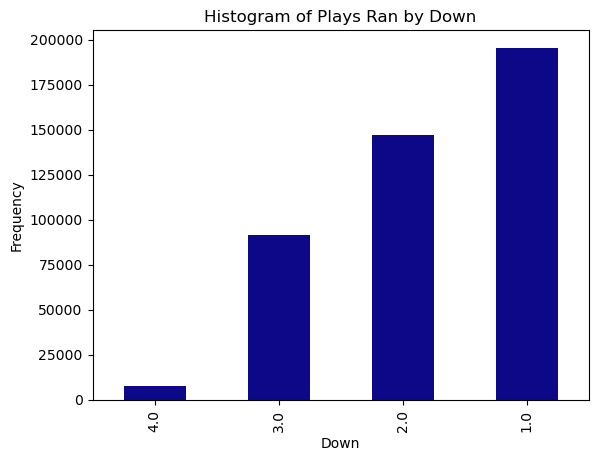

In [71]:
df.down.value_counts().sort_values().plot(kind='bar', xlabel = 'Down', ylabel = 'Frequency', title= 'Histogram of Plays Ran by Down', colormap = 'plasma') 

<AxesSubplot:title={'center':'Histogram of Plays by Week'}, xlabel='Week', ylabel='Frequency'>

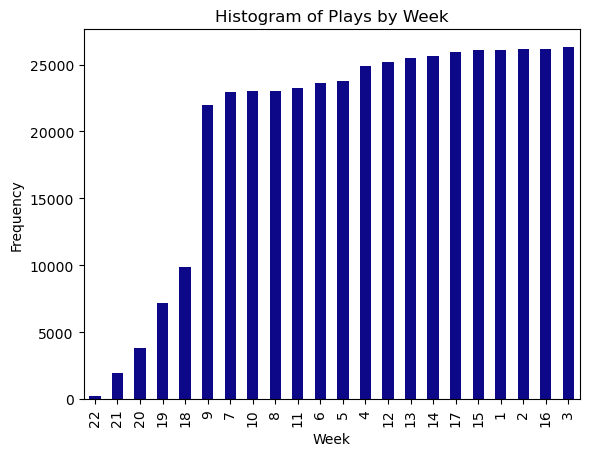

In [65]:
df.week.value_counts().sort_values().plot(kind='bar', xlabel = 'Week', ylabel = 'Frequency', title= 'Histogram of Plays by Week', colormap = 'plasma') 

<AxesSubplot:title={'center':'Histogram of Plays by Wind Speed'}, xlabel='Wind Speed', ylabel='Frequency'>

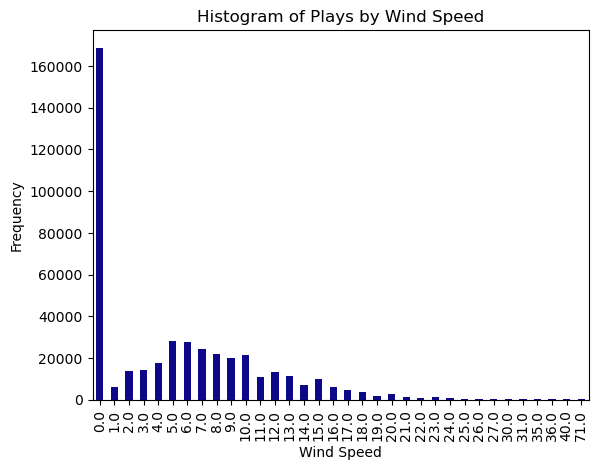

In [4]:
windSorted = df.sort_values('wind')
windSorted = windSorted.fillna(0)
windSorted.wind.value_counts()[windSorted.wind.unique()].plot(kind='bar', xlabel = 'Wind Speed', ylabel = 'Frequency', title= 'Histogram of Plays by Wind Speed', colormap = 'plasma')

<AxesSubplot:title={'center':'Histogram of Plays by Season'}, xlabel='Season', ylabel='Frequency'>

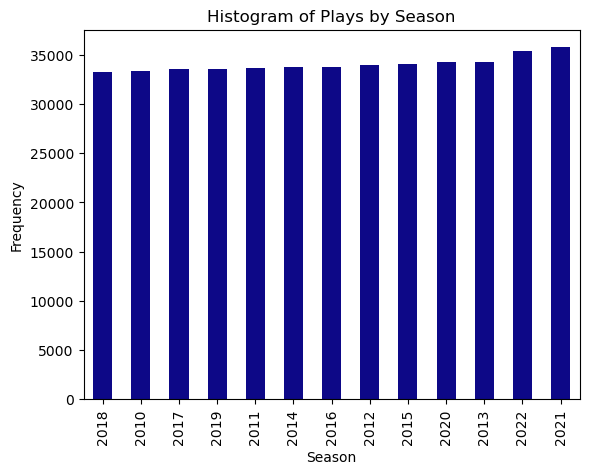

In [64]:
df.season.value_counts().sort_values().plot(kind='bar', xlabel = 'Season', ylabel = "Frequency", title= 'Histogram of Plays by Season', colormap = 'plasma') 

<AxesSubplot:title={'center':'Histogram of Plays Ran in Shotgun'}, xlabel='Shotgun Formation', ylabel='Frequency'>

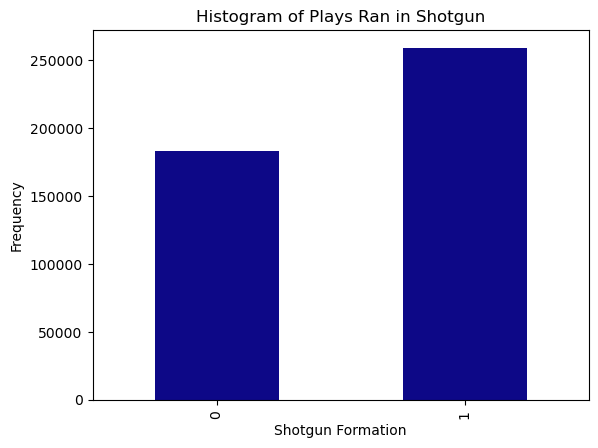

In [68]:
df.shotgun.value_counts().sort_values().plot(kind='bar', xlabel = 'Shotgun Formation', ylabel = 'Frequency', title= 'Histogram of Plays Ran in Shotgun', colormap = 'plasma') 

<AxesSubplot:title={'center':'Histogram of Plays by Starting Yardline'}, xlabel='yardline', ylabel='Frequency'>

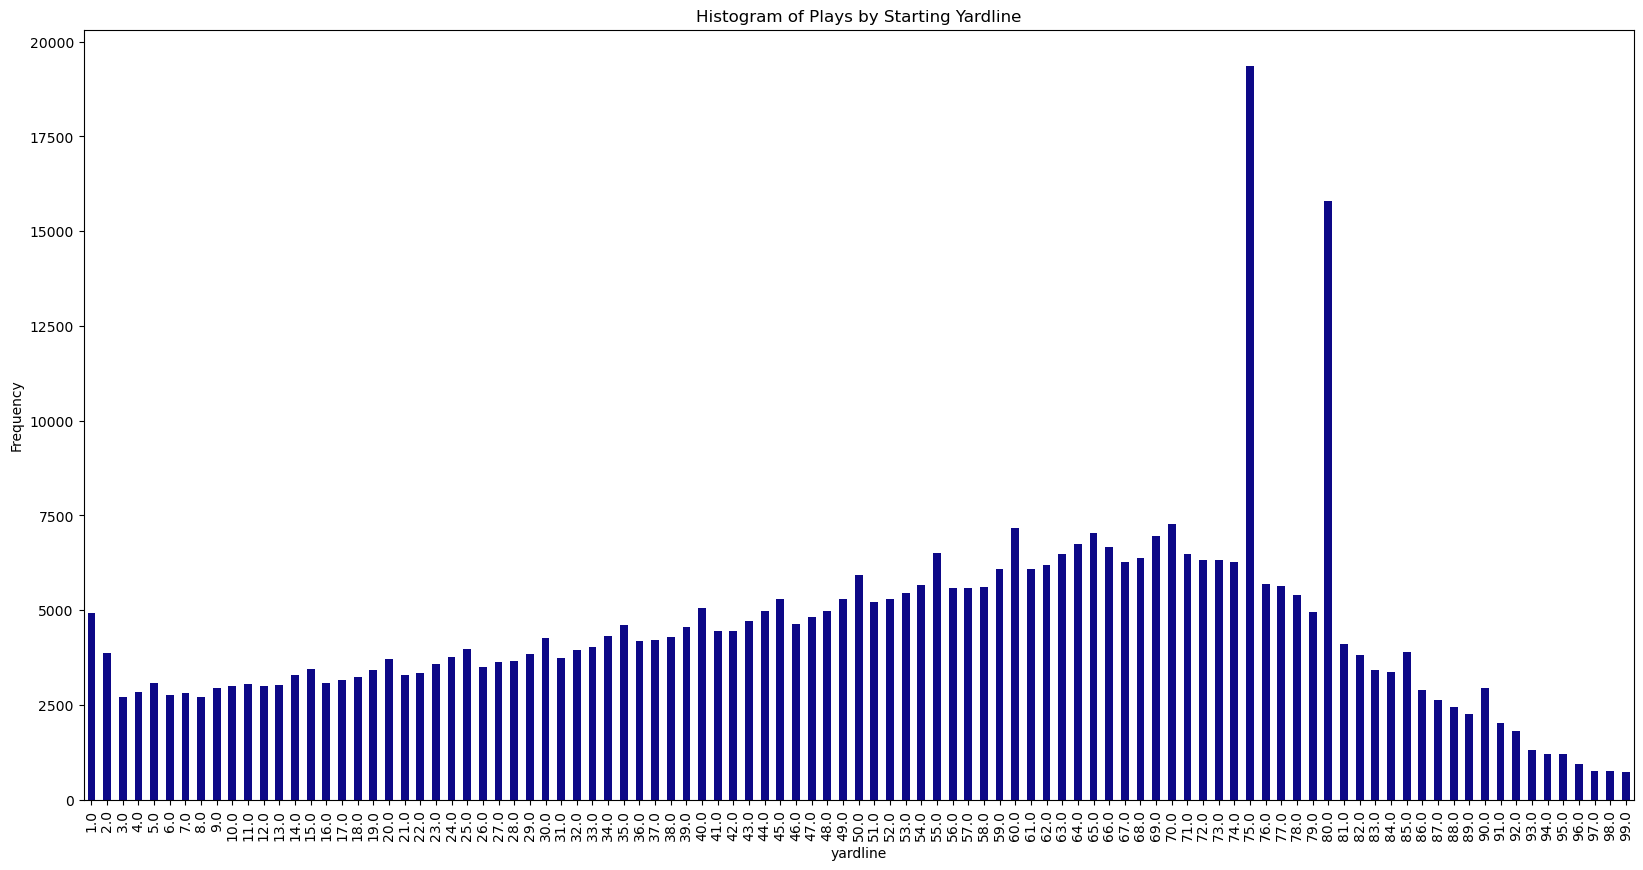

In [66]:
yardLine = df.sort_values('yardline_100')
yardLine.yardline_100.value_counts()[yardLine.yardline_100.unique()].plot(kind='bar', title= 'Histogram of Plays by Starting Yardline', colormap = 'plasma', xlabel = 'yardline', ylabel = 'Frequency', figsize = (20, 10))

<AxesSubplot:title={'center':'Histogram of Plays by Yards to Go'}, xlabel='Yards To Go', ylabel='Frequency'>

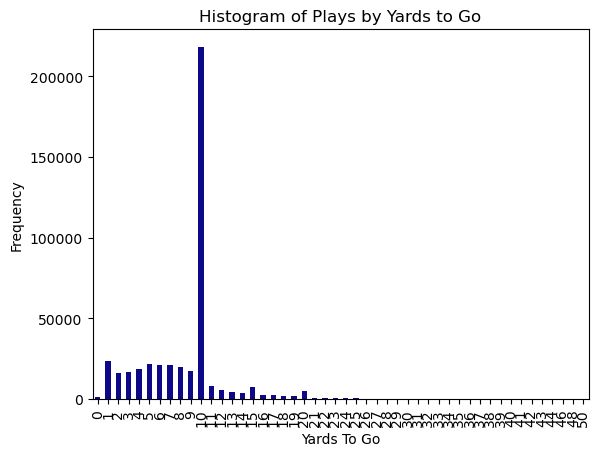

In [69]:
ydsGo = df.sort_values('ydstogo')
ydsGo.ydstogo.value_counts()[ydsGo.ydstogo.unique()].plot(kind='bar', xlabel = 'Yards To Go', ylabel = 'Frequency', title= 'Histogram of Plays by Yards to Go', colormap = 'plasma')

/tmp/ipykernel_5545/1582825031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heatMapDf.play_type=heatMapDf.play_type.astype('category').cat.codes


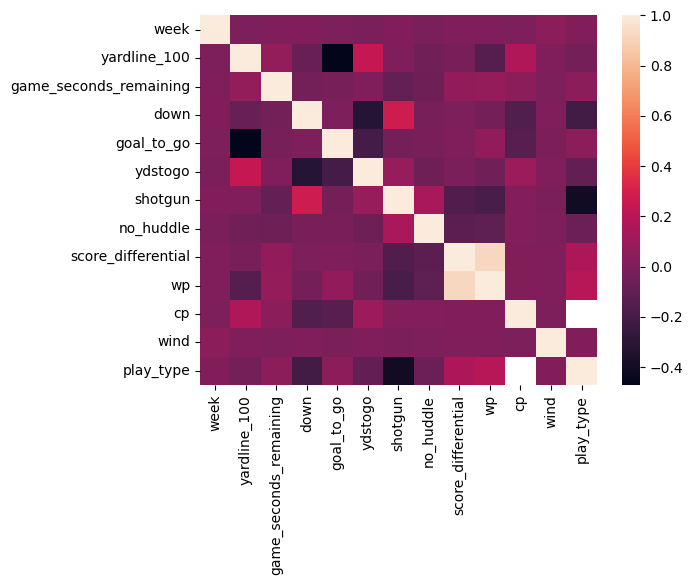

In [5]:
heatMapDf = df[['season_type', 'week', 'yardline_100', 'game_seconds_remaining', 'down', 'goal_to_go', 'ydstogo', 'shotgun', 'no_huddle', 'score_differential', 'wp', 'cp', 'wind', 'play_type']]
heatMapDf.play_type=heatMapDf.play_type.astype('category').cat.codes
cormat = heatMapDf.corr()
round(cormat,2)
sns.heatmap(cormat);

In [70]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for regression model using 'rating' as response variable 
y, X = dmatrices('play_type ~ down+ydstogo+shotgun', data=df, return_type='dataframe')

#create DataFrame to hold VIF values
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns 

#calculate VIF for each predictor variable 
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#view VIF for each predictor variable 
print(vif_df)

    variable        VIF
0  Intercept  15.161143
1       down   1.245807
2    ydstogo   1.158738
3    shotgun   1.119626


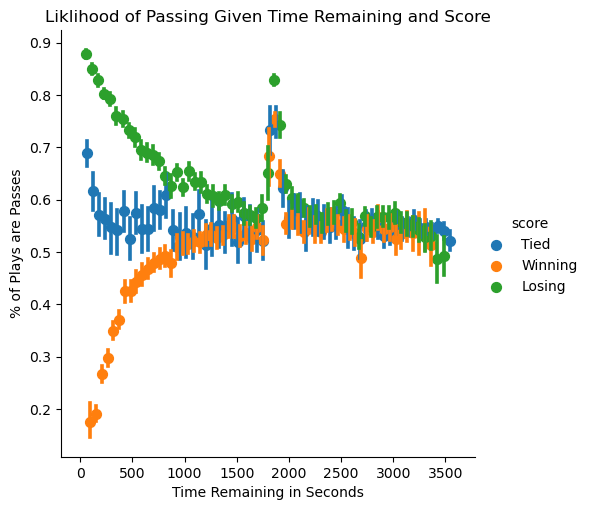

In [7]:
timescore = df[['game_seconds_remaining', 'score_differential', 'play_type']]

winning = timescore[(timescore['score_differential'] > 0)]
losing = timescore[(timescore['score_differential'] < 0)]
tie = timescore[(timescore['score_differential'] == 0)]

passesW = winning[(winning['play_type'] == 'pass')].groupby(['game_seconds_remaining']).count()
runsW = winning[(winning['play_type'] == 'run')].groupby(['game_seconds_remaining']).count()
passesW['play_type'] = passesW['play_type'] / (passesW['play_type'] + runsW['play_type'])
passesW = passesW.reset_index()

passesL = losing[(losing['play_type'] == 'pass')].groupby(['game_seconds_remaining']).count()
runsL = losing[(losing['play_type'] == 'run')].groupby(['game_seconds_remaining']).count()
passesL['play_type'] = passesL['play_type'] / (passesL['play_type'] + runsL['play_type'])
passesL = passesL.reset_index()

passesT = tie[(tie['play_type'] == 'pass')].groupby(['game_seconds_remaining']).count()
runsT = tie[(tie['play_type'] == 'run')].groupby(['game_seconds_remaining']).count()
passesT['play_type'] = passesT['play_type'] / (passesT['play_type'] + runsT['play_type'])
passesT = passesT.reset_index()

passesT['score'] = 'Tied'
passesW['score'] = 'Winning'
passesL['score'] = 'Losing'

pdList = [passesT, passesW, passesL]  # List of your dataframes
new_df = pd.concat(pdList)
#print(new_df.head())
#print(passesW.plot.scatter(x = 'game_seconds_remaining', y='play_type', use_index=True, legend=False, title = 'Liklihood of Passing by Time Remaining of Teams That Are Currently Winning', ylabel= '% of Plays = Pass', xlabel= 'Time Remaining in Seconds', colormap = 'plasma', s = .1))
#print(passesL.plot.scatter(x = 'game_seconds_remaining', y='play_type', use_index=True, legend=False, title = 'Liklihood of Passing by Time Remaining of Teams That Are Currently Losing', ylabel= '% of Plays = Pass', xlabel= 'Time Remaining in Seconds', colormap = 'plasma', s = .1))
#print(passesT.plot.scatter(x = 'game_seconds_remaining', y='play_type', use_index=True, legend=False, title = 'Liklihood of Passing by Time Remaining of Teams That Are Currently Tied', ylabel= '% of Plays = Pass', xlabel= 'Time Remaining in Seconds', colormap = 'plasma', s = .1))
#sns.regplot(data = passesW, x= 'game_seconds_remaining', y= 'play_type', x_bins=120)
ax = sns.lmplot(data = new_df, x= 'game_seconds_remaining', y= 'play_type', hue = 'score', x_bins=60, fit_reg=False)
ax.set(xlabel='Time Remaining in Seconds',
       ylabel='% of Plays are Passes',
       title='Liklihood of Passing Given Time Remaining and Score')
#plt.show()

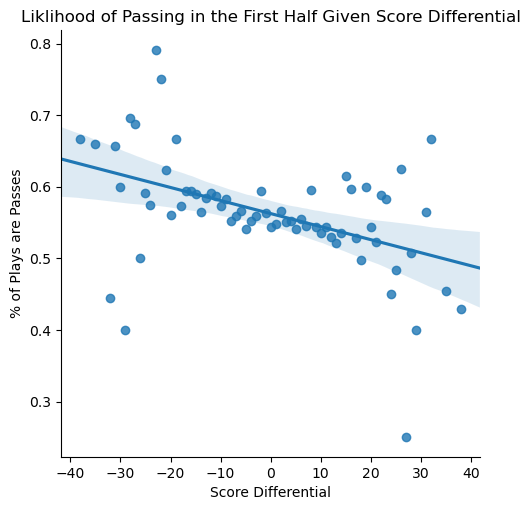

In [6]:
score = df[(df["game_seconds_remaining"] > 2000)]
score = score[['score_differential', 'play_type']]
passes = score[(score['play_type'] == 'pass')].groupby(['score_differential']).count()
runs = score[(score['play_type'] == 'run')].groupby(['score_differential']).count()
passes['play_type'] = passes['play_type'] / (passes['play_type'] + runs['play_type'])
#passes.plot(y='play_type', use_index=True, ylabel= '% of Plays = Pass', xlabel= 'Score Differential', title= 'Liklihood of Passing Based on Score Differential', colormap = 'plasma', legend=False)
passes = passes.reset_index()
passes = passes[(passes['score_differential'] > -40) & (passes['score_differential'] < 40)]

ax = sns.lmplot(data = passes, x= 'score_differential', y= 'play_type', fit_reg=True, order = 1, truncate=False)

#ax.set(ylim=(0, 1.0), xlim=(1, 10))
ax.set(xlabel='Score Differential',
       ylabel='% of Plays are Passes',
       title='Liklihood of Passing in the First Half Given Score Differential')


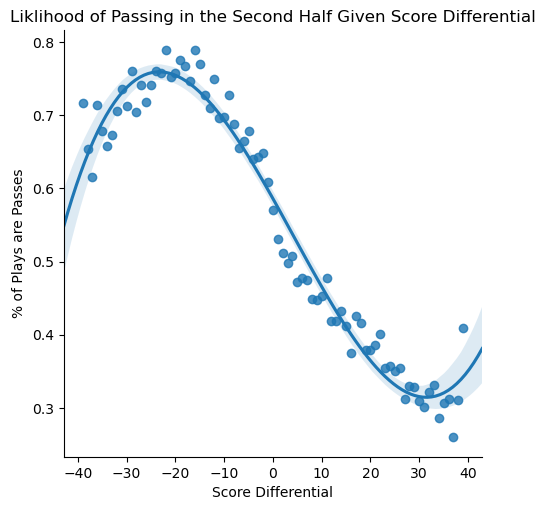

In [60]:
score = df[(df["game_seconds_remaining"] < 1800)]
score = score[['score_differential', 'play_type']]
passes = score[(score['play_type'] == 'pass')].groupby(['score_differential']).count()
runs = score[(score['play_type'] == 'run')].groupby(['score_differential']).count()
passes['play_type'] = passes['play_type'] / (passes['play_type'] + runs['play_type'])
#passes.plot(y='play_type', use_index=True, ylabel= '% of Plays = Pass', xlabel= 'Score Differential', title= 'Liklihood of Passing Based on Score Differential', colormap = 'plasma', legend=False)
passes = passes.reset_index()
passes = passes[(passes['score_differential'] > -40) & (passes['score_differential'] < 40)]

ax = sns.lmplot(data = passes, x= 'score_differential', y= 'play_type', fit_reg=True, order = 3, truncate=False)

#ax.set(ylim=(0, 1.0), xlim=(1, 10))
ax.set(xlabel='Score Differential',
       ylabel='% of Plays are Passes',
       title='Liklihood of Passing in the Second Half Given Score Differential')

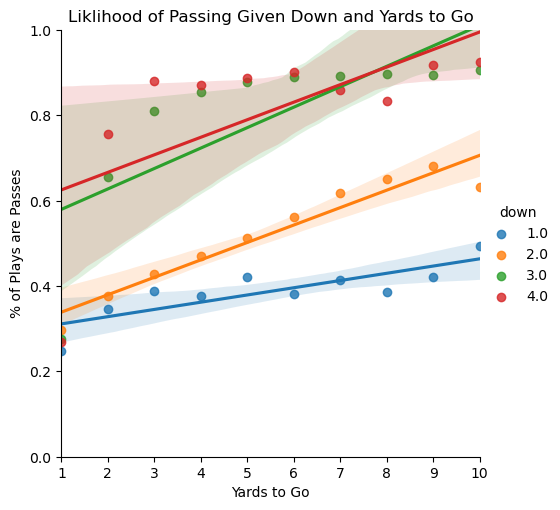

In [37]:
downyds = df[['down', 'ydstogo', 'play_type']]
downyds = downyds[downyds['ydstogo'] < 11]
passes = downyds[(downyds['play_type'] == 'pass')].groupby(['down', 'ydstogo']).count()
runs = downyds[(downyds['play_type'] == 'run')].groupby(['down', 'ydstogo']).count()
passes['passPercent'] = passes['play_type'] / (passes['play_type'] + runs['play_type'])
passes = passes.reset_index()

ax = sns.lmplot(data = passes, x= 'ydstogo', y= 'passPercent', hue = 'down', fit_reg=True, truncate=False)

ax.set(ylim=(0, 1.0), xlim=(1, 10))
ax.set(xlabel='Yards to Go',
       ylabel='% of Plays are Passes',
       title='Liklihood of Passing Given Down and Yards to Go')

plt.show()

AxesSubplot(0.125,0.11;0.775x0.77)


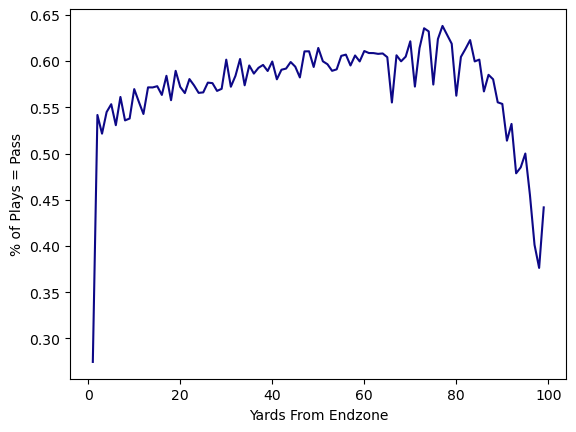

In [54]:
yEz = df[['yardline_100', 'play_type']]
passes = yEz[(yEz['play_type'] == 'pass')].groupby(['yardline_100']).count()
runs = yEz[(yEz['play_type'] == 'run')].groupby(['yardline_100']).count()
passes['play_type'] = passes['play_type'] / (passes['play_type'] + runs['play_type'])
print(passes.plot(y='play_type', use_index=True, legend=False, ylabel= '% of Plays = Pass', xlabel= 'Yards From Endzone', colormap = 'plasma'))

<AxesSubplot:title={'center':'Liklihood of Passing Based on Wind'}, xlabel='Wind MPH', ylabel='% Of Plays are Passes'>

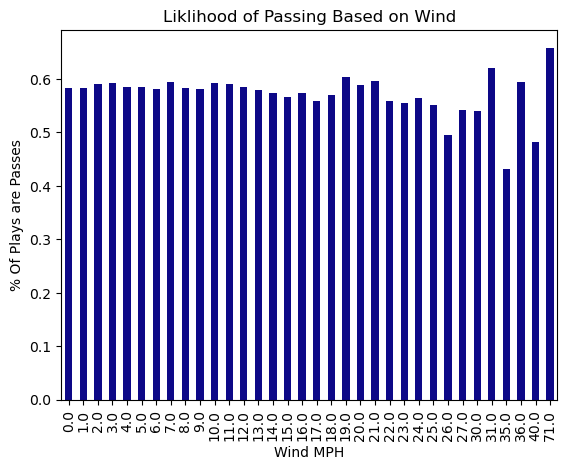

In [21]:
wind = df[['wind', 'play_type']]
passes = wind[(wind['play_type'] == 'pass')].groupby(['wind']).count()
runs = wind[(wind['play_type'] == 'run')].groupby(['wind']).count()
passes['play_type'] = passes['play_type'] / (passes['play_type'] + runs['play_type'])
passes.plot(kind = 'bar', y='play_type', use_index=True, title = 'Liklihood of Passing Based on Wind', xlabel='Wind MPH', ylabel='% Of Plays are Passes', colormap = 'plasma', legend=False)

<AxesSubplot:title={'center':'Liklihood of Passing Based on Temprature F'}, xlabel='Temprature F', ylabel='% Of Plays are Passes'>

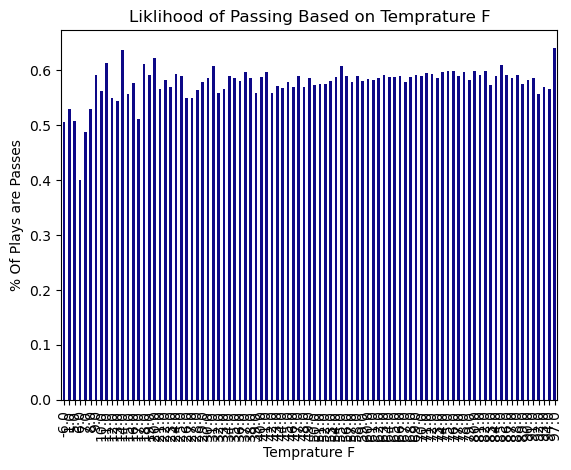

In [56]:
tempra = df[['temp', 'play_type']]
passes = tempra[(tempra['play_type'] == 'pass')].groupby(['temp']).count()
runs = tempra[(tempra['play_type'] == 'run')].groupby(['temp']).count()
passes['play_type'] = passes['play_type'] / (passes['play_type'] + runs['play_type'])
passes.plot(kind = 'bar', y='play_type', use_index=True, title = 'Liklihood of Passing Based on Temprature F', xlabel='Temprature F', ylabel='% Of Plays are Passes', colormap = 'plasma', legend=False)

<AxesSubplot:title={'center':'Liklihood of Passing Based if Lined Up Shotgun'}, xlabel='is Shotgun', ylabel='% Of Plays are Passes'>

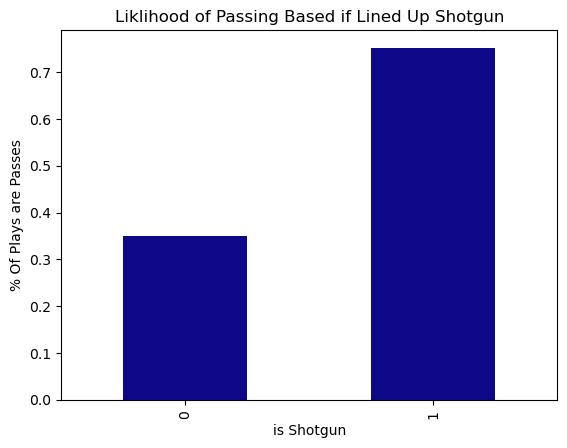

In [57]:
shotgun = df[['shotgun', 'play_type']]
passes = shotgun[(shotgun['play_type'] == 'pass')].groupby(['shotgun']).count()
runs = shotgun[(shotgun['play_type'] == 'run')].groupby(['shotgun']).count()
passes['play_type'] = passes['play_type'] / (passes['play_type'] + runs['play_type'])
passes.plot(kind = 'bar', y='play_type', use_index=True, title = 'Liklihood of Passing Based if Lined Up Shotgun', xlabel='is Shotgun', ylabel='% Of Plays are Passes', colormap = 'plasma', legend=False)

<AxesSubplot:title={'center':'Liklihood of Passing Based on Season'}, xlabel='Season', ylabel='% Of Plays are Passes'>

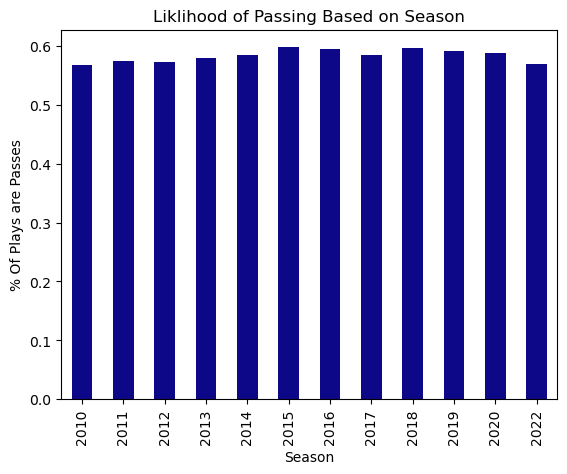

In [58]:
season = df[['season', 'play_type']]
passes = season[(season['play_type'] == 'pass')].groupby(['season']).count()
runs = season[(season['play_type'] == 'run')].groupby(['season']).count()
passes['play_type'] = passes['play_type'] / (passes['play_type'] + runs['play_type'])
passes.plot(kind = 'bar', y='play_type', use_index=True, title = 'Liklihood of Passing Based on Season', xlabel='Season', ylabel='% Of Plays are Passes', colormap = 'plasma', legend=False)

<AxesSubplot:title={'center':'Liklihood of Passing Based on Week'}, xlabel='Week', ylabel='% Of Plays are Passes'>

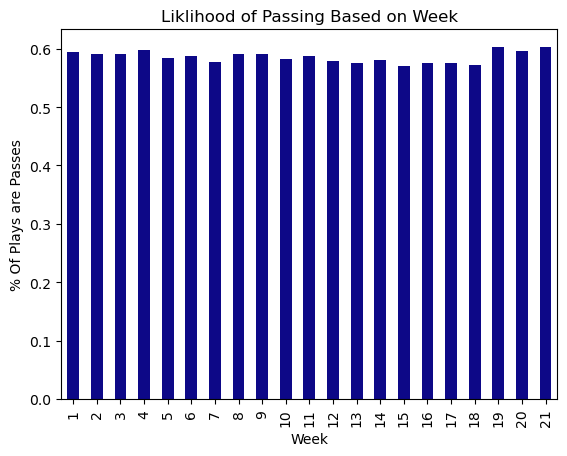

In [59]:
week = df[['week', 'play_type']]
passes = week[(week['play_type'] == 'pass')].groupby(['week']).count()
runs = week[(week['play_type'] == 'run')].groupby(['week']).count()
passes['play_type'] = passes['play_type'] / (passes['play_type'] + runs['play_type'])
passes.plot(kind = 'bar', y='play_type', use_index=True, title = 'Liklihood of Passing Based on Week', xlabel='Week', ylabel='% Of Plays are Passes', colormap = 'plasma', legend=False)

<AxesSubplot:title={'center':'Liklihood of Passing Based on if the Offense Huddled Pre-Snap'}, xlabel='is No Huddle', ylabel='% Of Plays are Passes'>

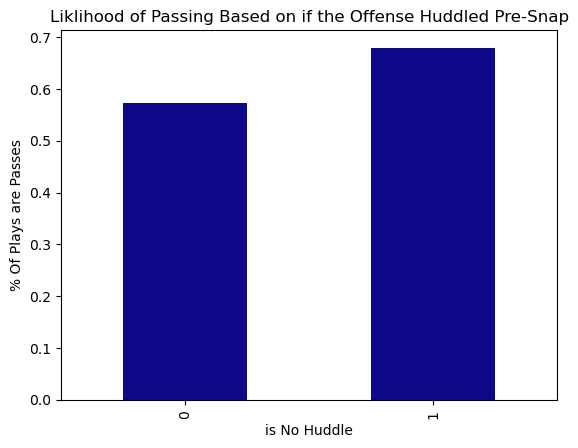

In [60]:
no_huddle = df[['no_huddle', 'play_type']]
passes = no_huddle[(no_huddle['play_type'] == 'pass')].groupby(['no_huddle']).count()
runs = no_huddle[(no_huddle['play_type'] == 'run')].groupby(['no_huddle']).count()
passes['play_type'] = passes['play_type'] / (passes['play_type'] + runs['play_type'])
passes.plot(kind = 'bar', y='play_type', use_index=True, title = 'Liklihood of Passing Based on if the Offense Huddled Pre-Snap', xlabel='is No Huddle', ylabel='% Of Plays are Passes', colormap = 'plasma', legend=False)

In [20]:
testdf = timescore.loc[1:3]
x = 2.0
y = 3.0
df2 = pd.DataFrame([[x, y, 'run']], columns=['game_seconds_remaining', 'score_differential', 'play_type'], index=['x'])
testdf = testdf.append(df2, ignore_index=True)
print(testdf.head())


   game_seconds_remaining  score_differential play_type
0                     0.0                 0.0      pass
1                  3564.0                 0.0       run
2                     2.0                 3.0       run


/tmp/ipykernel_11710/4046065787.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  testdf = testdf.append(df2, ignore_index=True)


       yardline_100  game_seconds_remaining         down      shotgun  \
count        4914.0             4914.000000  4820.000000  4914.000000   
mean            1.0             1618.221205     1.969295     0.202279   
std             0.0             1010.603279     0.967135     0.401740   
min             1.0                0.000000     1.000000     0.000000   
25%             1.0              734.250000     1.000000     0.000000   
50%             1.0             1603.500000     2.000000     0.000000   
75%             1.0             2464.750000     3.000000     0.000000   
max             1.0             3580.000000     4.000000     1.000000   

         no_huddle  score_differential  
count  4914.000000         4914.000000  
mean      0.060440           -1.629833  
std       0.238324           10.834729  
min       0.000000          -45.000000  
25%       0.000000           -7.000000  
50%       0.000000            0.000000  
75%       0.000000            4.000000  
max       1.00

/tmp/ipykernel_5410/997844835.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heatMapDf.play_type=heatMapDf.play_type.astype('category').cat.codes


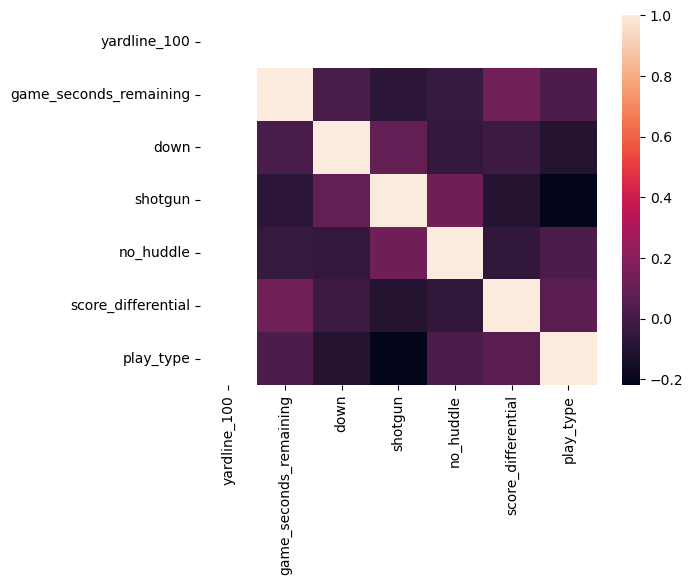

In [45]:
on1yd = df[(df["yardline_100"] < 2)]
#print(on1yd.describe())
heatMapDf = on1yd[['yardline_100', 'game_seconds_remaining', 'down', 'shotgun', 'no_huddle', 'score_differential', 'play_type']]
print(heatMapDf.describe())
heatMapDf.play_type=heatMapDf.play_type.astype('category').cat.codes
cormat = heatMapDf.corr()
round(cormat,2)
sns.heatmap(cormat);